In [28]:
# Import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mixture Models Clustering
## Non probabilistic models
### K-means
*K-means* algorithm is an unsupervised machine learning technique that aims to partition $n$ observations into $k$ clusters ($k$ is a parameter of the algorithm) in such a way that every data point is allocated to the nearest cluster.

We will see how this simple clustering algorithm works on a toy dataset, enlighting its main limitations. <br>
Then we will show how probabilistic models can overcome them.


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

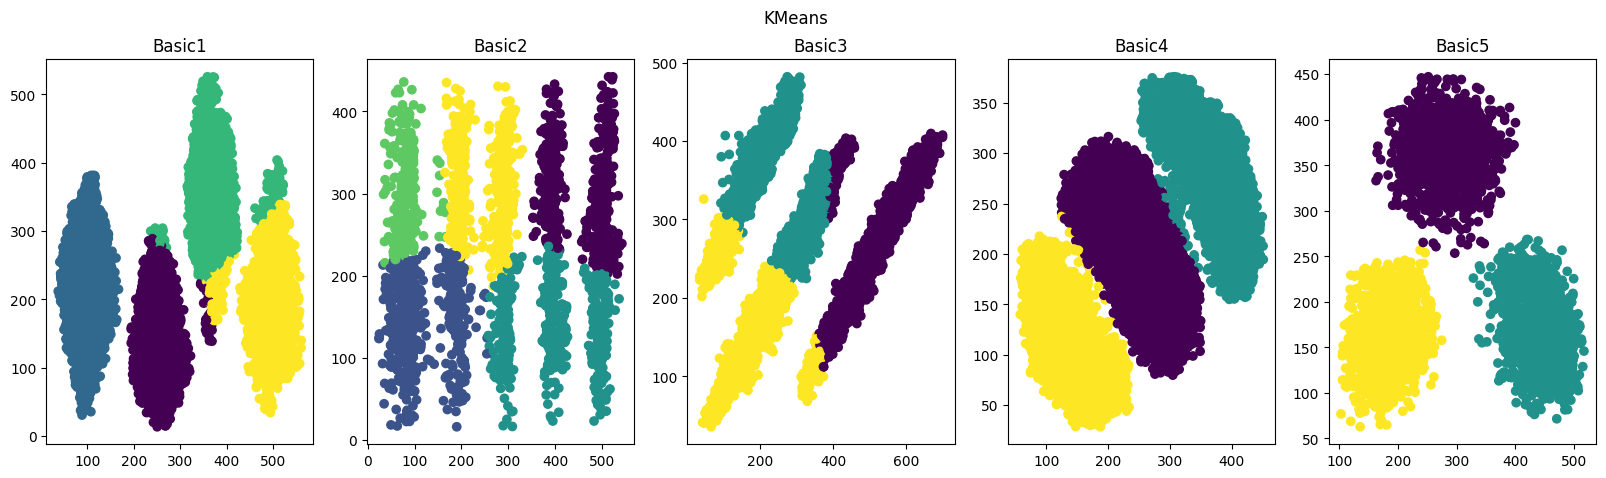

In [29]:
# KMeans
from sklearn.cluster import KMeans

# Load data
df_basic1 = pd.read_csv('./data/basic1.csv')
df_basic2 = pd.read_csv('./data/basic2.csv')
df_basic3 = pd.read_csv('./data/basic3.csv')
df_basic4 = pd.read_csv('./data/basic4.csv')
df_basic5 = pd.read_csv('./data/basic5.csv')

# Apply KMeans
kmeans_basic1 = KMeans(n_clusters=4, random_state=0).fit(df_basic1)
kmeans_basic2 = KMeans(n_clusters=5, random_state=0).fit(df_basic2)
kmeans_basic3 = KMeans(n_clusters=3, random_state=0).fit(df_basic3)
kmeans_basic4 = KMeans(n_clusters=3, random_state=0).fit(df_basic4) 
kmeans_basic5 = KMeans(n_clusters=3, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=kmeans_basic1.labels_)
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=kmeans_basic2.labels_)
ax[1].set_title('Basic2')
ax[2].scatter(df_basic3['x'], df_basic3['y'], c=kmeans_basic3.labels_)
ax[2].set_title('Basic3')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=kmeans_basic4.labels_)
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=kmeans_basic5.labels_)
ax[4].set_title('Basic5')
fig.suptitle('KMeans')
plt.show()

KMeans doesn't work well with non-convex clusters.

Let's see how GMM works on the same data for comparison.

First we try GMM with EM, using the same number of clusters as K-means.

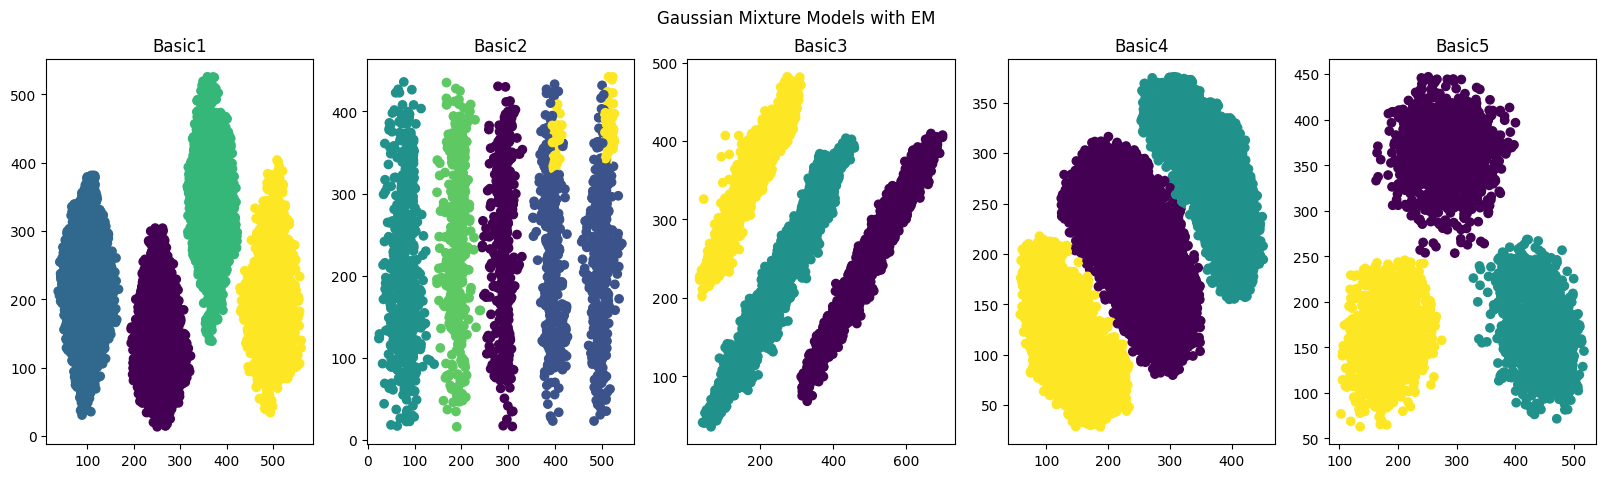

In [30]:
# GMM with EM
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture
gmm_basic1 = GaussianMixture(n_components=4, random_state=0).fit(df_basic1)
gmm_basic2 = GaussianMixture(n_components=5, random_state=0).fit(df_basic2)
gmm_basic3 = GaussianMixture(n_components=3, random_state=0).fit(df_basic3)
gmm_basic4 = GaussianMixture(n_components=3, random_state=0).fit(df_basic4)
gmm_basic5 = GaussianMixture(n_components=3, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=gmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=gmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_basic3['x'], df_basic3['y'], c=gmm_basic3.predict(df_basic3))
ax[2].set_title('Basic3')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=gmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=gmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Gaussian Mixture Models with EM')
plt.show()


As you can see in this example, GMM with EM works better than K-means when the clusters are not in a spherical shape, and it also still works good with the convex ones.

A drawback of both these techniques is that they require the number of clusters to be specified.

Now let's see how Bayesian GMM works on this data.

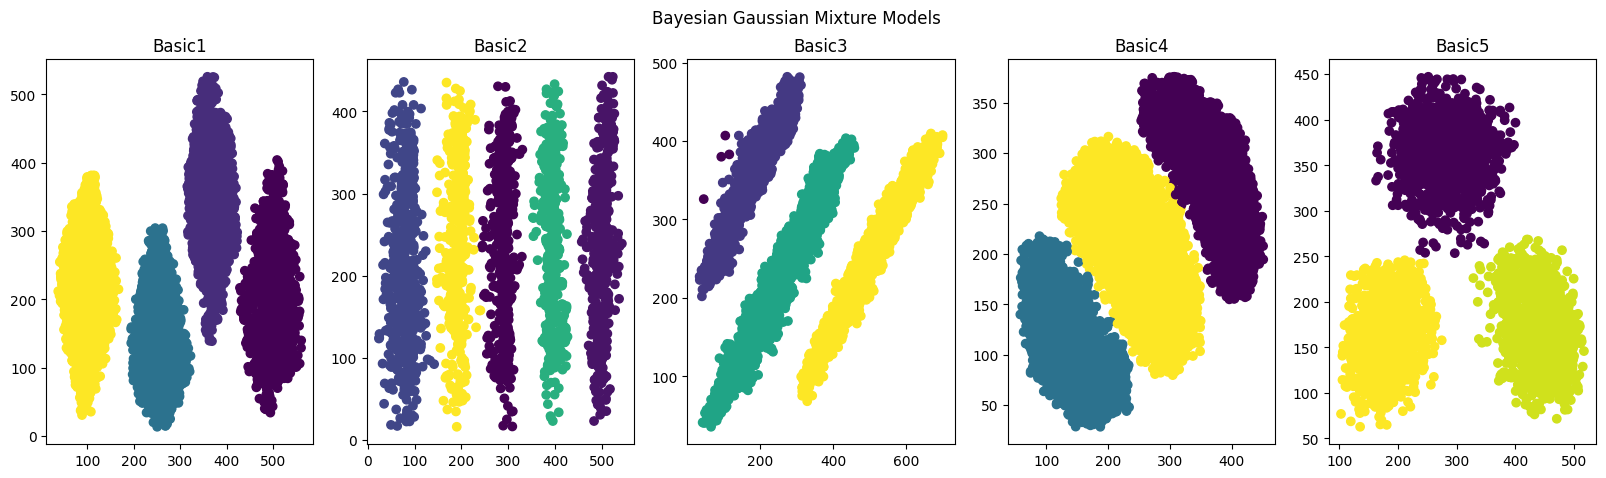

In [31]:
# Bayesian GMM
from sklearn.mixture import BayesianGaussianMixture

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_basic1 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic1)
bgmm_basic2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic2)
bgmm_basic3 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic3)
bgmm_basic4 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic4)
bgmm_basic5 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=bgmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=bgmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_basic3['x'], df_basic3['y'], c=bgmm_basic3.predict(df_basic3))
ax[2].set_title('Basic3')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=bgmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=bgmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

Bayesian GMM is able to detect the number of clusters automatically, and it also works better than KMeans in the case of non-spherical data, so it's better overall when compared to the two previous techniques.

### DBSCAN
*Density-Based Special Clustering of Applications with Noise*, commonly know as DBSCAN, is another machine learning algorithm that belongs to unsupervised learning techniques.

Usually it works well with dense, clearly separated clusters, of any shape, even if the separation is not linear.

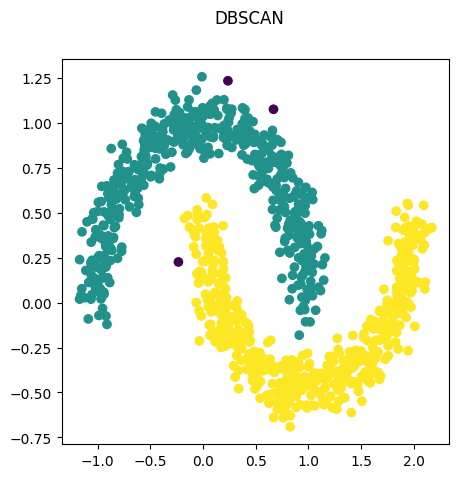

In [118]:
# DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate data
## Moons
X_moons, y_moons = make_moons(n_samples=1000, noise=.09, random_state=11)


# Apply DBSCAN
dbscan_moons = DBSCAN(eps=.11, min_samples=3).fit(X_moons)

# Plotting results
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan_moons.labels_)
fig.suptitle('DBSCAN')
plt.show()

The half-moons example confirms that DBSCAN works well with non-linearly separable data.

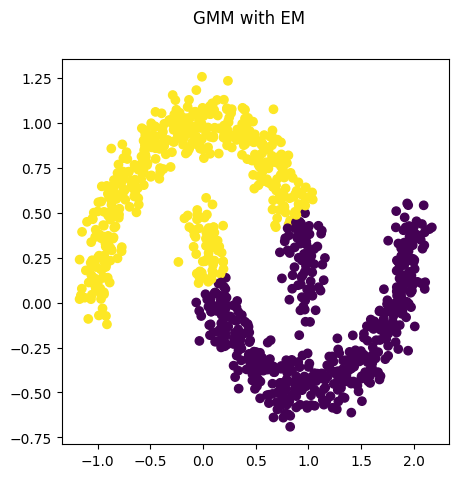

In [119]:
# GMM with EM

# Apply Gaussian Mixture
gmm_moons = GaussianMixture(n_components=2, random_state=11).fit(X_moons)

# Plotting results
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=gmm_moons.predict(X_moons))
fig.suptitle('GMM with EM')
plt.show()

GMM with EM is a generalization of KMeans, so it inherits its drawbacks, like the need for linear separation.

/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


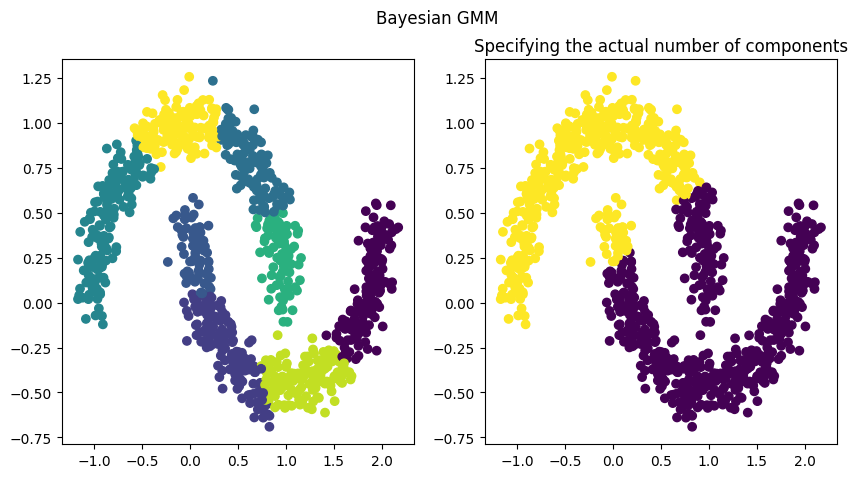

In [121]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_moons_free = BayesianGaussianMixture(n_components=15, random_state=11).fit(X_moons)
bgmm_moons_specific = BayesianGaussianMixture(n_components=2, random_state=11).fit(X_moons)

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=bgmm_moons_free.predict(X_moons))
ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c=bgmm_moons_specific.predict(X_moons))
ax[1].set_title('Specifying the actual number of components')
fig.suptitle('Bayesian GMM')
plt.show()

Even BGMM has the same problems of GMM with EM, it also shows problems on infering the number of components automatically, when the clusters are non-linearly separable.


### Hierarchical clustering
*Hierarchical clustering* is a method for clustering. It creates groups so that objects within a group are similar to each other and different from objects that belong to another group. 
Different approches to solve the Hierarchical problem include Agglomerative (bottom-up) and Divisive (top-down).
## Probabilistic models
### Bayesian Gaussian Mixture Models
### Bayesian Mixture Models with other distributions
### Mixture Models with EM
### Model comparisons